importing some libraries for preprocessing , splitting ,vsualiztion and for accuracy meassurement 

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import  pyplot as plt
import seaborn as sns

importing data to perform operations

In [74]:
data = pd.read_csv('tested.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


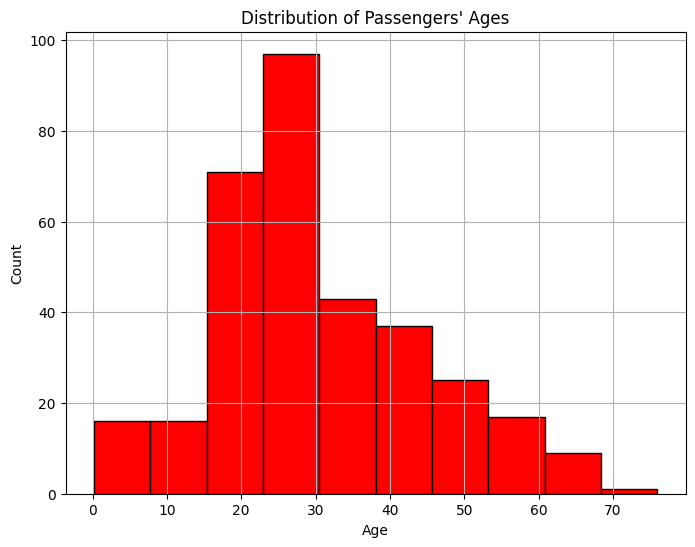

In [75]:

plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=10, edgecolor="black", color='r')
plt.title('Distribution of Passengers\' Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

checking all info about data

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


checking whether there is any null value

In [77]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


counting all values (to know  how many values are missing)

In [78]:
data.count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

droping irrelevant data which is not required for training 

In [79]:
unnecessary_features= ['Cabin','Name','PassengerId','Ticket']
data.drop(columns=unnecessary_features,axis=1,inplace=True)

In [80]:
data.count()

Survived    418
Pclass      418
Sex         418
Age         332
SibSp       418
Parch       418
Fare        417
Embarked    418
dtype: int64

difference of value count

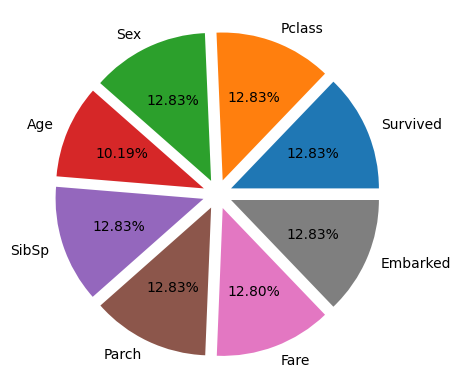

In [81]:
columns = data.columns 
count = [data[col].count() for col in columns]
plt.pie(count, labels=columns, explode=[0.1]*len(columns), autopct='%0.2f%%')
plt.show()

droping a single row where null value is present

In [82]:
data.dropna(subset="Fare",axis=0,inplace=True)

age has lot of missing value so we are replacing them with median of Age

In [83]:
data['Age'].fillna(data['Age'].median(),inplace=True)


In [84]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


shows no missing value and each column has equal count

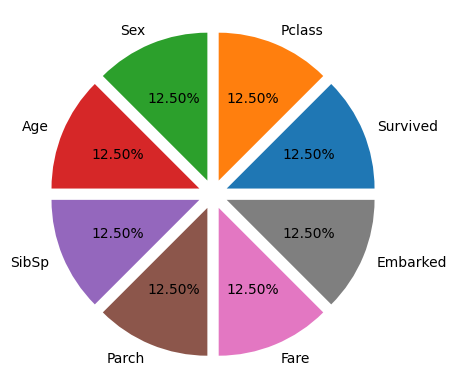

In [99]:
columns = data.columns 
count = [data[col].count() for col in columns]
plt.pie(count, labels=columns, explode=[0.1]*len(columns), autopct='%0.2f%%')
plt.show()

gender and embarked contains string values so we used dummies to convert them in boolean

In [85]:
preprocessed_data=pd.get_dummies(data)

In [86]:
preprocessed_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,34.5,0,0,7.8292,False,True,False,True,False
1,1,3,47.0,1,0,7.0000,True,False,False,False,True
2,0,2,62.0,0,0,9.6875,False,True,False,True,False
3,0,3,27.0,0,0,8.6625,False,True,False,False,True
4,1,3,22.0,1,1,12.2875,True,False,False,False,True


dividing features and target

In [87]:
target=preprocessed_data['Survived']
features=preprocessed_data.drop('Survived',axis=1)

In [88]:
features.tail(12)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
406,2,23.0,1,0,10.5000,False,True,False,False,True
407,1,50.0,1,1,211.5000,False,True,True,False,False
408,3,27.0,0,0,7.7208,True,False,False,True,False
409,3,3.0,1,1,13.7750,True,False,False,False,True
410,3,27.0,0,0,7.7500,True,False,False,True,False
411,1,37.0,1,0,90.0000,True,False,False,True,False
412,3,28.0,0,0,7.7750,True,False,False,False,True
413,3,27.0,0,0,8.0500,False,True,False,False,True
414,1,39.0,0,0,108.9000,True,False,True,False,False
415,3,38.5,0,0,7.2500,False,True,False,False,True


splitting data for  training  and testing

In [89]:
X_train,x_test,Y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=1)

In [90]:
print(len(y_test))

84


importing multiple algos for making models 

In [91]:
from sklearn.ensemble import RandomForestClassifier as rfs
from sklearn.svm import SVC 
from sklearn.naive_bayes import GaussianNB as GNB
from sklearn.neighbors import KNeighborsClassifier as knn

In [92]:

model2=rfs()
model3=SVC()
model4=GNB()
model5=knn(n_neighbors=5)

checking accuracy of each model

In [93]:
model2.fit(X_train,Y_train)
y_pred = model2.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,"%")

100.0 %


In [94]:
model3.fit(X_train,Y_train)
y_pred = model3.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,"%")

64.28571428571429 %


In [95]:
model4.fit(X_train,Y_train)
y_pred = model4.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,"%")

100.0 %


In [96]:
model5.fit(X_train,Y_train)
y_pred = model5.predict(x_test)
print(accuracy_score(y_test,y_pred)*100,"%")

72.61904761904762 %


In [97]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      417 non-null    int64  
 1   Age         417 non-null    float64
 2   SibSp       417 non-null    int64  
 3   Parch       417 non-null    int64  
 4   Fare        417 non-null    float64
 5   Sex_female  417 non-null    bool   
 6   Sex_male    417 non-null    bool   
 7   Embarked_C  417 non-null    bool   
 8   Embarked_Q  417 non-null    bool   
 9   Embarked_S  417 non-null    bool   
dtypes: bool(5), float64(2), int64(3)
memory usage: 21.6 KB


made final prediction by using the model having highest accuracy

In [98]:
model4.fit(features,target)
prediction=model4.predict(features.iloc[[4]])
print("result is :",prediction)

result is : [1]
